<a href="https://colab.research.google.com/github/Leandro2402-bit/TAM/blob/main/ReduccionDimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado - reducci√≥n de dimensi√≥n

- Se presentan los conceptos y simulaciones b√°sicas relacionadas con t√©cnicas cl√°sicas lineales y no lineales de reducci√≥n de dimensi√≥n.

## An√°lisis de componentes de principales - Principal Component Analysis (PCA)

![gifpca](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*TXIbCytfgo5p5hty.gif)


- PCA busca un espacio de menor dimensi√≥n que preserve la mayor cantidad de variabilidad posible desde el espacio original (alta dimensi√≥n).

- Desde una perspectiva generativa, PCA asume que los datos $\mathbf{X} \in \mathbb{R}^{N \times P}$ son generados desde un espacio de baja dimensi√≥n (espacio latente) $\mathbf{Z} \in \mathbb{R}^{N \times M}$, donde $M < P$:

\begin{equation}
\mathbf{X} = \mathbf{Z} \mathbf{W}^T,
\end{equation}

- $\mathbf{Z}=\mathbf{X}\mathbf{W}$: matriz de baja dimensi√≥n.
- $\mathbf{W} \in \mathbb{R}^{P \times M}$: componentes principales (loading vectors).

El problema de optimizaci√≥n desde el punto de vista generativo:

\begin{align}
\mathbf{W}^*=&\arg\min_\mathbf{W} \|\mathbf{X}-\mathbf{Z} \mathbf{W}^T\|_F \\
   \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}



- PCA tambi√©n puede resolverse maximizando la varianza de los datos proyectados.

- Asumiendo datos centralizados $\mathbf{X}$, la covarianza $\mathbf{\Sigma}\in \mathbb{R}^{P \times P}$ se define como:

\begin{equation}
\mathbf{\Sigma} = \frac{1}{N} \mathbf{X}^T \mathbf{X}.
\end{equation}

- El problema de optimizaci√≥n de PCA se puede reescribir como:

\begin{align}
\mathbf{W}^*=&\arg\max_\mathbf{W} \text{tr}(\mathbf{W}^T \mathbf{\Sigma} \mathbf{W}),\\
 \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}


- La soluci√≥n del problema se centra en los $M$ vectores propios de la matriz de covarianza, correspodiente a los $M$ valores propios m√°s altos.

- Ver la demostraci√≥n [PCA generativo a PCA por varianza](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf).


**Ejemplo:** Construyamos un conjunto de datos 3D del famoso dato sint√©tico rollo Suizo - Swiss Roll.

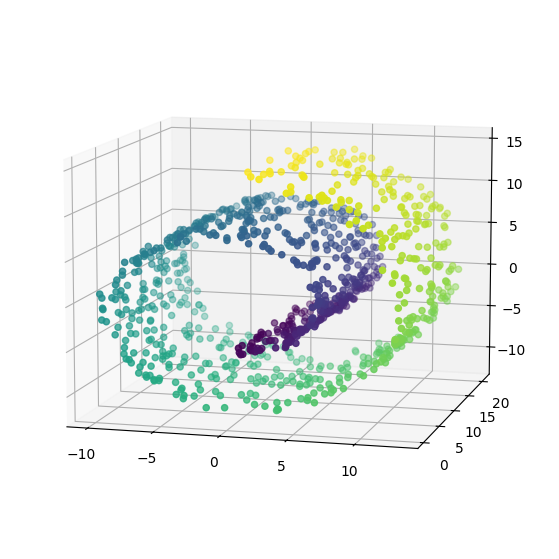

In [1]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
#t contiene el orden estructural de los datos
#crear scatter en 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

**NOTA:** PCA supone que el conjunto de datos se centra en el origen. Como veremos, las clases de PCA de Scikit-Learn se encargan de centrar los datos por usted. Sin embargo, si implementa PCA usted mismo, o si usa otras bibliotecas, **no olvide centrar los datos primero**, incluso considere aplicar normalizaci√≥n zscore.

**Usando PCA de scikit-learn**

-La clase PCA de Scikit-Learn implementa PCA usando la descomposici√≥n espectral (EIG y SVD).

-El siguiente c√≥digo aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones (tenga en cuenta que autom√°ticamente se encarga de centrar los datos):

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
Y2D = pca.fit_transform(X)

- El hiperpar√°metro `n_components` puede ser un n√∫mero entero (n√∫mero de dimensiones o componentes $M\leq P$) o un valor en el intervalo [0,1] para cuantificar el n√∫mero de componentes requerido para preservar una varianza retenida dada.

Tenga en cuenta que ejecutar PCA varias veces en conjuntos de datos ligeramente diferentes puede generar espacios latentes distintos. En general, la √∫nica diferencia es que algunos ejes pueden voltearse.

**Nota**: el problema de optimizaci√≥n de PCA que incluye costo y restricciones cuadr√°ticas, da como resultado un problema no convexo.

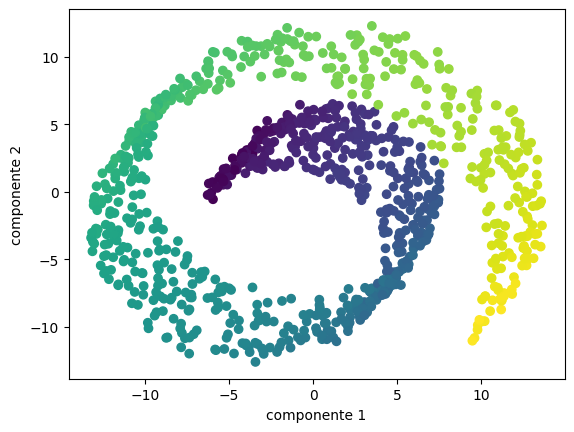

In [3]:
plt.scatter(Y2D[:,0],Y2D[:,1],c=t)
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.show()

Ahora vamos a recuperar los puntos 3D proyectados en el plano (subespacio PCA 2D).

In [4]:
X3D_inv = pca.inverse_transform(Y2D)

Por supuesto, **hubo cierta p√©rdida de informaci√≥n durante el paso de proyecci√≥n**, por lo que los puntos 3D recuperados *no son exactamente iguales a los puntos 3D originales*:

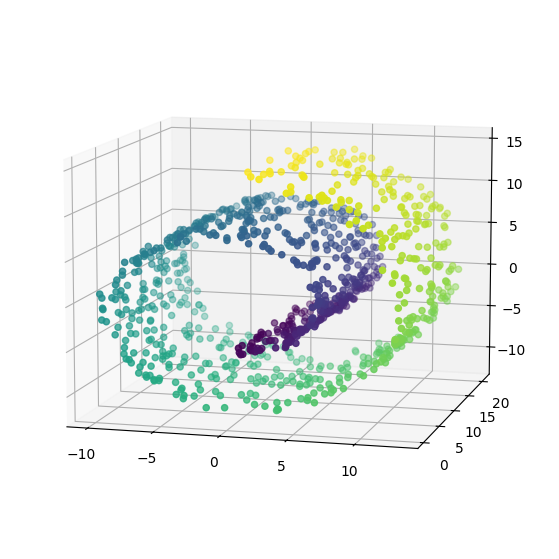

In [5]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

Podemos calcular el error de reconstrucci√≥n:

In [6]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

np.float64(4.751275566890726e-29)

Las reconstrucciones de ambos m√©todos **no son id√©nticas** porque la clase PCA de Scikit-Learn se encarga autom√°ticamente de revertir el centrado medio, *pero si restamos la media, obtenemos la misma reconstrucci√≥n*.

El objeto PCA da acceso a los componentes principales que calcul√≥:

In [7]:
pca.components_

array([[ 0.56791312,  0.15670748,  0.80803308],
       [ 0.77712377,  0.2213858 , -0.5891239 ],
       [-0.27120717,  0.96251291,  0.00394679]])

# Ejercicio 1

- Presente el problema de optimizaci√≥n de PCA como un algoritmo generativo (reconstrucci√≥n o filtrado de datos), y compare el problema de optimizaci√≥n desde el punto de vista generativo vs. preservaci√≥n de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



# PCA: Enfoque Generativo vs Preservaci√≥n de Varianza

## 1. PCA como Algoritmo Generativo (Reconstrucci√≥n)

### Formulaci√≥n del Problema de Optimizaci√≥n

En el enfoque **generativo**, PCA se plantea como un problema de **reconstrucci√≥n √≥ptima** de los datos originales.

**Objetivo**: Encontrar una representaci√≥n de menor dimensi√≥n que permita reconstruir los datos originales con el m√≠nimo error cuadr√°tico.

### Formulaci√≥n Matem√°tica

Dado un conjunto de datos **X ‚àà ‚Ñù‚ÅøÀ£·µà** (n muestras, d dimensiones), queremos:

1. **Codificar**: X ‚Üí Z (dimensi√≥n reducida k < d)
2. **Decodificar**: Z ‚Üí XÃÇ (reconstrucci√≥n)

**Funci√≥n Objetivo (Generativa)**:
```
min ||X - XÃÇ||¬≤_F = min ||X - ZW^T||¬≤_F
W,Z                   W,Z
```

Donde:
- **Z ‚àà ‚Ñù‚ÅøÀ£·µè**: representaci√≥n en espacio reducido
- **W ‚àà ‚Ñù·µàÀ£·µè**: matriz de decodificaci√≥n/reconstrucci√≥n
- **XÃÇ = ZW^T**: datos reconstruidos

### Constraintes del Problema Generativo

Para evitar soluciones triviales, se impone:
```
W^T W = I_k  (ortonormalidad de las columnas de W)
```

## 2. PCA como Preservaci√≥n de Varianza

### Formulaci√≥n del Problema de Optimizaci√≥n

En el enfoque de **preservaci√≥n de varianza**, PCA busca las direcciones que **maximizan la varianza** de los datos proyectados.

**Objetivo**: Encontrar las direcciones principales que capturen la m√°xima variabilidad de los datos.

### Formulaci√≥n Matem√°tica

**Funci√≥n Objetivo (Preservaci√≥n de Varianza)**:
```
max Tr(W^T C W)  sujeto a W^T W = I_k
 W
```

Donde:
- **C = (1/n)X^T X**: matriz de covarianza
- **Tr(¬∑)**: traza de la matriz
- **W**: matriz de direcciones principales

## 3. Comparaci√≥n de Ambos Enfoques

### Equivalencia Matem√°tica

**Teorema**: Ambas formulaciones son **matem√°ticamente equivalentes** y conducen a la misma soluci√≥n.

### Demostraci√≥n de Equivalencia

**Paso 1 - Minimizaci√≥n del Error de Reconstrucci√≥n**:
```
min ||X - ZW^T||¬≤_F = min ||X||¬≤_F - 2Tr(X^T ZW^T) + ||ZW^T||¬≤_F
W,Z                   W,Z
```

**Paso 2 - Soluci√≥n √ìptima para Z**:
Para W fijo, la soluci√≥n √≥ptima es: **Z* = XW**

**Paso 3 - Sustituci√≥n**:
```
min ||X - XWW^T||¬≤_F = ||X||¬≤_F - ||XWW^T||¬≤_F
 W                   = ||X||¬≤_F - Tr(W^T X^T XW)
```

**Paso 4 - Equivalencia**:
```
min ||X - XWW^T||¬≤_F ‚â° max Tr(W^T X^T XW) ‚â° max Tr(W^T C W)
 W                      W                     W
```

### Diferencias Conceptuales

| Aspecto | Enfoque Generativo | Preservaci√≥n de Varianza |
|---------|-------------------|-------------------------|
| **Objetivo** | Minimizar error de reconstrucci√≥n | Maximizar varianza preservada |
| **Interpretaci√≥n** | Filtrado/compresi√≥n √≥ptima | An√°lisis de variabilidad |
| **Aplicaci√≥n** | Denoising, compresi√≥n | An√°lisis exploratorio |
| **Ventaja** | Intuici√≥n clara de p√©rdida | Interpretaci√≥n estad√≠stica |

### Interpretaci√≥n Geom√©trica

**Enfoque Generativo**:
- Busca el **subespacio k-dimensional** que mejor aproxima los datos
- Minimiza la **distancia perpendicular** al subespacio

**Preservaci√≥n de Varianza**:
- Encuentra las **direcciones de m√°xima dispersi√≥n**
- Proyecta sobre el subespacio de mayor variabilidad

## 4. Ventajas de Cada Perspectiva

### Enfoque Generativo
- **Aplicaciones pr√°cticas**: denoising, compresi√≥n, imputaci√≥n
- **Extensibilidad**: f√°cil generalizaci√≥n a autoencoders
- **Interpretaci√≥n**: p√©rdida de informaci√≥n cuantificable

### Preservaci√≥n de Varianza
- **An√°lisis estad√≠stico**: comprensi√≥n de la estructura de datos
- **Selecci√≥n de componentes**: criterios basados en varianza explicada
- **Teor√≠a cl√°sica**: conexi√≥n con an√°lisis multivariado

## 5. Algoritmo de Soluci√≥n

### M√©todo de los Autovectores
1. Calcular matriz de covarianza: **C = (1/n)X^T X**
2. Encontrar autovectores y autovalores: **Cv_i = Œª_i v_i**
3. Ordenar por autovalores decrecientes: **Œª‚ÇÅ ‚â• Œª‚ÇÇ ‚â• ... ‚â• Œª·µà**
4. Seleccionar primeros k autovectores: **W = [v‚ÇÅ, v‚ÇÇ, ..., v‚Çñ]**

### Propiedades de la Soluci√≥n
- **Autovalores**: representan la varianza en cada componente principal
- **Autovectores**: direcciones de m√°xima varianza (ortonormales)
- **Varianza explicada**: Œ£·µ¢‚Çå‚ÇÅ·µè Œª·µ¢ / Œ£·µ¢‚Çå‚ÇÅ·µà Œª·µ¢

AN√ÅLISIS COMPARATIVO: ENFOQUES DE PCA
=== ENFOQUE GENERATIVO: Minimizaci√≥n del Error de Reconstrucci√≥n ===

Datos originales: (200, 3)
Matriz de covarianza:
[[ 1.00502513 -0.70117792 -0.60466904]
 [-0.70117792  1.00502513  0.93195674]
 [-0.60466904  0.93195674  1.00502513]]

Convergencia alcanzada en iteraci√≥n 7
Error de reconstrucci√≥n final: 12.635437
Componentes principales (W):
[[-0.79540182  0.59002107]
 [-0.30725423 -0.58966787]
 [-0.52242779 -0.55151332]]

=== COMPARACI√ìN CON SOLUCI√ìN ANAL√çTICA ===
Componentes PCA (autovectores):
[[-0.52444679  0.61237398  0.59156882]
 [ 0.84008575  0.25905747  0.47659749]]
Error de reconstrucci√≥n PCA: 12.635437
Diferencia en error: 0.00000000


=== ENFOQUE PRESERVACI√ìN DE VARIANZA ===

Autovalores (varianza de cada componente):
  PC1: 2.5058
  PC2: 0.4458
  PC3: 0.0635

Varianza total: 3.0151

Porcentaje de varianza explicada:
  PC1: 83.1% (acumulado: 83.1%)
  PC2: 14.8% (acumulado: 97.9%)
  PC3: 2.1% (acumulado: 100.0%)

Con 2 compone

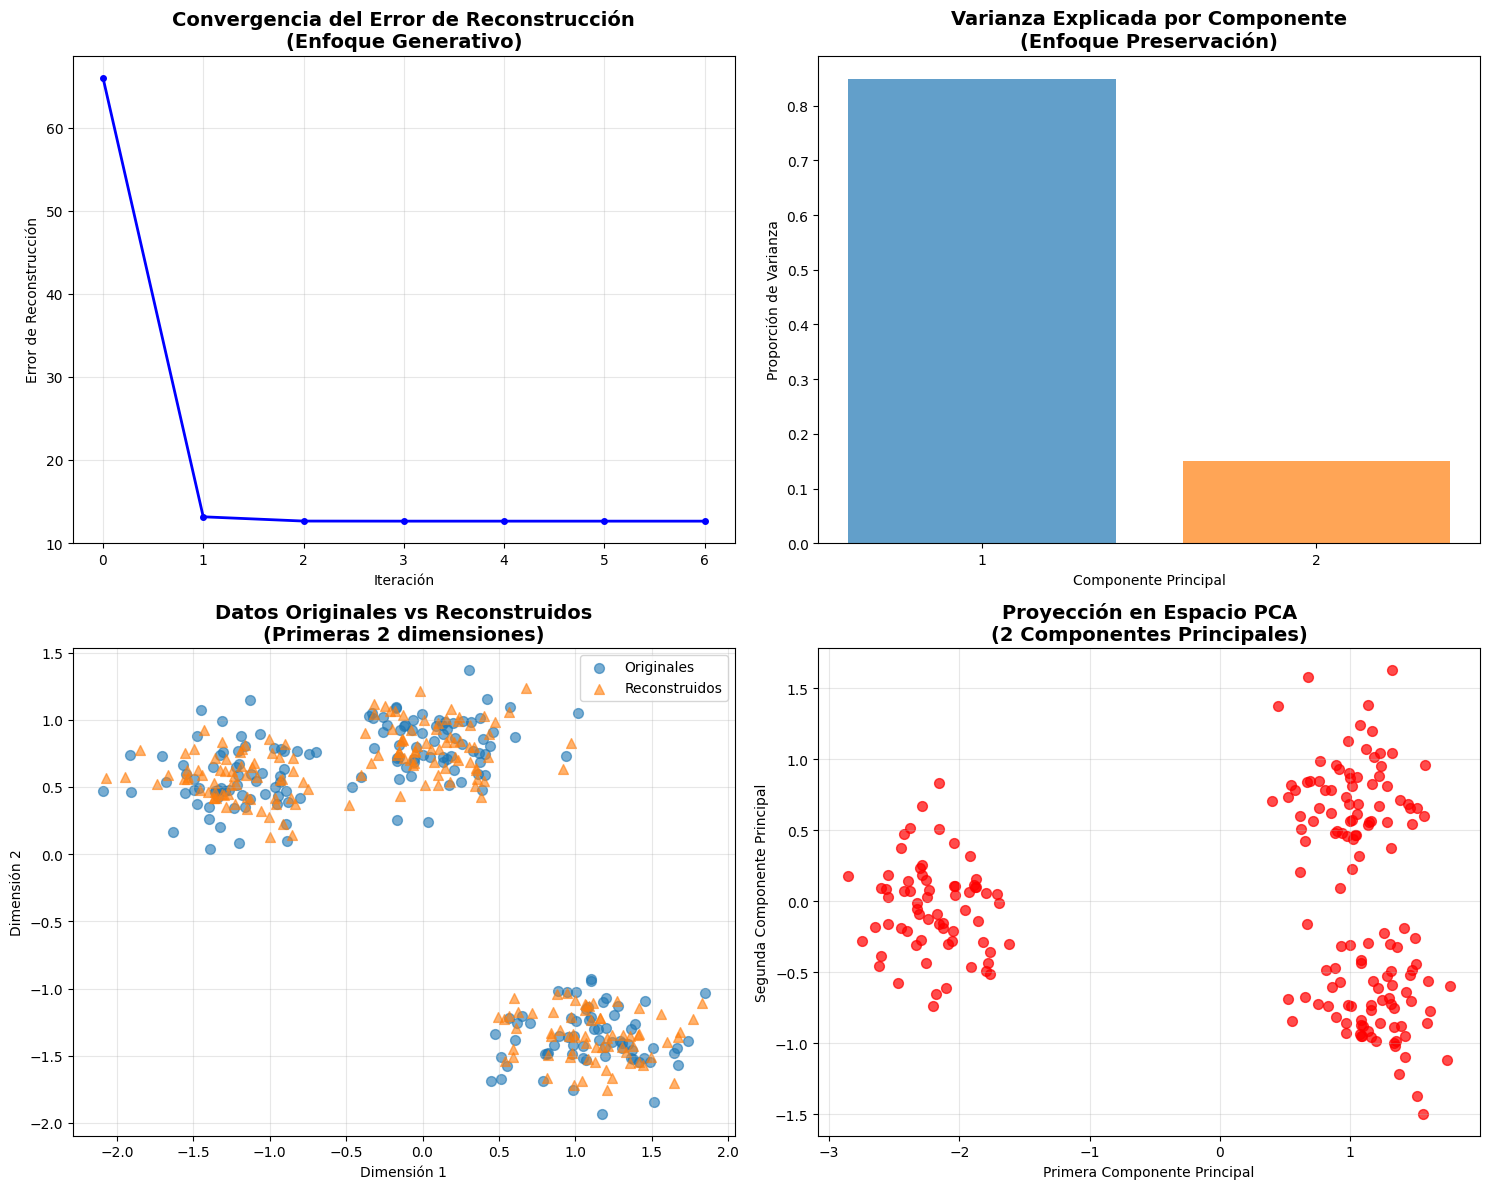


An√°lisis completado. ¬°Ambos enfoques son matem√°ticamente equivalentes!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

class PCAComparison:
    """
    Implementaci√≥n de PCA desde dos perspectivas:
    1. Enfoque Generativo (minimizaci√≥n del error de reconstrucci√≥n)
    2. Preservaci√≥n de Varianza (maximizaci√≥n de varianza)
    """

    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components_ = None
        self.explained_variance_ = None
        self.mean_ = None

    def fit(self, X):
        """Ajusta PCA usando descomposici√≥n en autovalores"""
        # Centrar los datos
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        # Calcular matriz de covarianza
        cov_matrix = np.cov(X_centered.T)

        # Descomposici√≥n en autovalores y autovectores
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Ordenar por autovalores decrecientes
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Seleccionar componentes principales
        self.components_ = eigenvectors[:, :self.n_components].T
        self.explained_variance_ = eigenvalues[:self.n_components]

        return self

    def transform(self, X):
        """Proyecta datos al espacio de menor dimensi√≥n"""
        X_centered = X - self.mean_
        return np.dot(X_centered, self.components_.T)

    def inverse_transform(self, Z):
        """Reconstruye datos desde el espacio reducido"""
        return np.dot(Z, self.components_) + self.mean_

    def reconstruction_error(self, X):
        """Calcula el error de reconstrucci√≥n (enfoque generativo)"""
        Z = self.transform(X)
        X_reconstructed = self.inverse_transform(Z)
        return np.sum((X - X_reconstructed) ** 2)

    def explained_variance_ratio(self):
        """Calcula la proporci√≥n de varianza explicada"""
        total_variance = np.sum(self.explained_variance_)
        return self.explained_variance_ / total_variance

def generative_optimization_demo():
    """
    Demostraci√≥n del enfoque generativo:
    Minimizaci√≥n iterativa del error de reconstrucci√≥n
    """
    print("=== ENFOQUE GENERATIVO: Minimizaci√≥n del Error de Reconstrucci√≥n ===\n")

    # Generar datos sint√©ticos
    np.random.seed(42)
    X, _ = make_blobs(n_samples=200, centers=3, n_features=3,
                      random_state=42, cluster_std=1.5)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    print(f"Datos originales: {X.shape}")
    # Remove the format specifier from the print statement
    print(f"Matriz de covarianza:\n{np.cov(X.T)}\n")

    # Implementaci√≥n iterativa del enfoque generativo
    def optimize_reconstruction(X, k, max_iter=100, tol=1e-6):
        n, d = X.shape

        # Inicializaci√≥n aleatoria
        W = np.random.randn(d, k)
        W, _ = np.linalg.qr(W)  # Ortonormalizar

        errors = []

        for iteration in range(max_iter):
            # Paso 1: Optimizar Z dado W
            Z = X @ W

            # Paso 2: Optimizar W dado Z
            # Soluci√≥n anal√≠tica: W = V_k de SVD(X^T Z)
            U, s, Vt = np.linalg.svd(X.T @ Z, full_matrices=False)
            W = U @ Vt

            # Calcular error de reconstrucci√≥n
            X_recon = Z @ W.T
            error = np.sum((X - X_recon) ** 2)
            errors.append(error)

            # Criterio de convergencia
            if iteration > 0 and abs(errors[-2] - errors[-1]) < tol:
                print(f"Convergencia alcanzada en iteraci√≥n {iteration + 1}")
                break

        return W, Z, errors

    # Optimizaci√≥n iterativa
    W_opt, Z_opt, errors = optimize_reconstruction(X, k=2)

    print(f"Error de reconstrucci√≥n final: {errors[-1]:.6f}")
    print(f"Componentes principales (W):\n{W_opt}\n")

    # Comparar con soluci√≥n anal√≠tica (autovectores)
    pca = PCAComparison(n_components=2)
    pca.fit(X)

    print("=== COMPARACI√ìN CON SOLUCI√ìN ANAL√çTICA ===")
    print(f"Componentes PCA (autovectores):\n{pca.components_}")
    print(f"Error de reconstrucci√≥n PCA: {pca.reconstruction_error(X):.6f}")
    print(f"Diferencia en error: {abs(errors[-1] - pca.reconstruction_error(X)):.8f}\n")

    return errors, pca, X

def variance_preservation_demo():
    """
    Demostraci√≥n del enfoque de preservaci√≥n de varianza
    """
    print("=== ENFOQUE PRESERVACI√ìN DE VARIANZA ===\n")

    # Usar los mismos datos
    np.random.seed(42)
    X, _ = make_blobs(n_samples=200, centers=3, n_features=3,
                      random_state=42, cluster_std=1.5)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # An√°lisis de varianza
    pca = PCAComparison(n_components=3)  # Todas las componentes
    pca.fit(X)

    print("Autovalores (varianza de cada componente):")
    for i, var in enumerate(pca.explained_variance_):
        print(f"  PC{i+1}: {var:.4f}")

    print(f"\nVarianza total: {np.sum(pca.explained_variance_):.4f}")

    print("\nPorcentaje de varianza explicada:")
    ratios = pca.explained_variance_ratio()
    cumulative = np.cumsum(ratios)

    for i, (ratio, cum) in enumerate(zip(ratios, cumulative)):
        print(f"  PC{i+1}: {ratio:.1%} (acumulado: {cum:.1%})")

    # Criterio de selecci√≥n de componentes
    print(f"\nCon 2 componentes se preserva {cumulative[1]:.1%} de la varianza")

    return pca, ratios

def visualization_comparison(errors, pca, X):
    """Visualizaci√≥n de ambos enfoques"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Convergencia del algoritmo generativo
    axes[0,0].plot(errors, 'b-', linewidth=2, marker='o', markersize=4)
    axes[0,0].set_title('Convergencia del Error de Reconstrucci√≥n\n(Enfoque Generativo)',
                       fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Iteraci√≥n')
    axes[0,0].set_ylabel('Error de Reconstrucci√≥n')
    axes[0,0].grid(True, alpha=0.3)

    # 2. Varianza explicada por componente
    ratios = pca.explained_variance_ratio()
    axes[0,1].bar(range(1, len(ratios)+1), ratios,
                  color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
    axes[0,1].set_title('Varianza Explicada por Componente\n(Enfoque Preservaci√≥n)',
                       fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Componente Principal')
    axes[0,1].set_ylabel('Proporci√≥n de Varianza')
    axes[0,1].set_xticks(range(1, len(ratios)+1))

    # 3. Datos originales vs reconstruidos
    Z = pca.transform(X)
    X_recon = pca.inverse_transform(Z)

    axes[1,0].scatter(X[:, 0], X[:, 1], alpha=0.6, label='Originales', s=50)
    axes[1,0].scatter(X_recon[:, 0], X_recon[:, 1], alpha=0.6,
                     label='Reconstruidos', s=50, marker='^')
    axes[1,0].set_title('Datos Originales vs Reconstruidos\n(Primeras 2 dimensiones)',
                       fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Dimensi√≥n 1')
    axes[1,0].set_ylabel('Dimensi√≥n 2')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # 4. Proyecci√≥n en espacio PCA
    axes[1,1].scatter(Z[:, 0], Z[:, 1], c='red', alpha=0.7, s=50)
    axes[1,1].set_title('Proyecci√≥n en Espacio PCA\n(2 Componentes Principales)',
                       fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Primera Componente Principal')
    axes[1,1].set_ylabel('Segunda Componente Principal')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

def mathematical_equivalence_proof():
    """Demostraci√≥n num√©rica de la equivalencia matem√°tica"""
    print("=== DEMOSTRACI√ìN DE EQUIVALENCIA MATEM√ÅTICA ===\n")

    # Generar datos peque√±os para demostraci√≥n clara
    np.random.seed(123)
    X = np.random.randn(5, 3)
    X = (X - np.mean(X, axis=0))  # Centrar

    print("Datos de ejemplo (centrados):")
    print(X)
    print()

    # M√©todo 1: Minimizaci√≥n del error de reconstrucci√≥n
    pca1 = PCAComparison(n_components=2)
    pca1.fit(X + np.mean(X, axis=0))  # A√±adir media para que fit() la centre

    reconstruction_error = pca1.reconstruction_error(X + np.mean(X, axis=0))

    print("M√©todo 1 - Minimizaci√≥n Error de Reconstrucci√≥n:")
    print(f"Error de reconstrucci√≥n: {reconstruction_error:.8f}")
    print(f"Componentes principales:\n{pca1.components_}")
    print()

    # M√©todo 2: Maximizaci√≥n de varianza
    C = np.cov(X.T)  # Matriz de covarianza
    eigenvals, eigenvecs = np.linalg.eigh(C)

    # Ordenar por autovalores decrecientes
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]

    # Seleccionar primeras 2 componentes
    W_variance = eigenvecs[:, :2].T

    preserved_variance = np.sum(eigenvals[:2])
    total_variance = np.sum(eigenvals)

    print("M√©todo 2 - Maximizaci√≥n de Varianza:")
    print(f"Varianza preservada: {preserved_variance:.8f}")
    print(f"Varianza total: {total_variance:.8f}")
    print(f"Componentes principales:\n{W_variance}")
    print()

    # Verificar equivalencia
    print("=== VERIFICACI√ìN DE EQUIVALENCIA ===")

    # Las componentes deben ser iguales (o diferir solo en signo)
    diff = np.abs(np.abs(pca1.components_) - np.abs(W_variance))
    print(f"Diferencia m√°xima en componentes: {np.max(diff):.10f}")

    # La relaci√≥n: Error_reconstrucci√≥n = Varianza_total - Varianza_preservada
    expected_error = total_variance - preserved_variance
    print(f"Error esperado (Var_total - Var_preservada): {expected_error:.8f}")
    print(f"Error calculado (reconstrucci√≥n): {reconstruction_error:.8f}")
    print(f"Diferencia: {abs(expected_error - reconstruction_error):.10f}")

    if np.max(diff) < 1e-8 and abs(expected_error - reconstruction_error) < 1e-8:
        print("\n‚úÖ EQUIVALENCIA MATEM√ÅTICA DEMOSTRADA")
    else:
        print("\n‚ùå Diferencias num√©ricas detectadas")

# Ejecutar todas las demostraciones
if __name__ == "__main__":
    print("AN√ÅLISIS COMPARATIVO: ENFOQUES DE PCA")
    print("=" * 50)

    # 1. Demostraci√≥n generativa
    errors, pca, X = generative_optimization_demo()

    print("\n" + "=" * 50)

    # 2. Demostraci√≥n preservaci√≥n de varianza
    pca_var, ratios = variance_preservation_demo()

    print("\n" + "=" * 50)

    # 3. Equivalencia matem√°tica
    mathematical_equivalence_proof()

    print("\n" + "=" * 50)

    # 4. Visualizaci√≥n
    print("Generando visualizaciones...")
    fig = visualization_comparison(errors, pca, X)

    print("\nAn√°lisis completado. ¬°Ambos enfoques son matem√°ticamente equivalentes!")

### Varianza retenida (explicada)

- El valor propio relacionado con cada compoenente, codifica la varianza retenida del espacio de entrada.

Por ejemplo, veamos las razones de varianza explicadas de los dos primeros componentes del conjunto de datos 3D representados

In [9]:
pca.explained_variance_ratio()

array([0.84897522, 0.15102478])


Esto le indica que **el 40.8% de la varianza del conjunto de datos se encuentra a lo largo del primer eje**, y el **30.2% se encuentra a lo largo del segundo eje**.

### Determinar el n√∫mero de dimensiones proyectas

El siguiente c√≥digo calcula PCA sin reducir la dimensionalidad, luego calcula el n√∫mero m√≠nimo de dimensiones requeridas para preservar el 95% de la variaci√≥n del conjunto de entrenamiento (se utilizar√° la base de datos Mnist que tiene 784 dimensiones de entrada).

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
(60000, 784) (60000,)


In [11]:
#se submuestrea para facilidad en c√°lculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


In [12]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1 #varianza acumulada ordenando componentes
d

np.int64(135)

Tambi√©n podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opci√≥n mucho mejor: en lugar de especificar el n√∫mero de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relaci√≥n de varianza que desea conservar:

In [13]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

In [14]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9503404973326779)

- Otra opci√≥n m√°s es **trazar la varianza explicada en funci√≥n del n√∫mero de dimensiones** (simplemente trazar *cumsum*; ver Figura a continuaci√≥n).

- Por lo general, habr√° un codo en la curva, donde la variaci√≥n explicada deja de crecer r√°pidamente. Puede pensar en esto como la dimensionalidad intr√≠nseca del conjunto de datos.

- En este caso, puede ver que reducir la dimensionalidad a unas 100 dimensiones no perder√≠a demasiada varianza explicada.

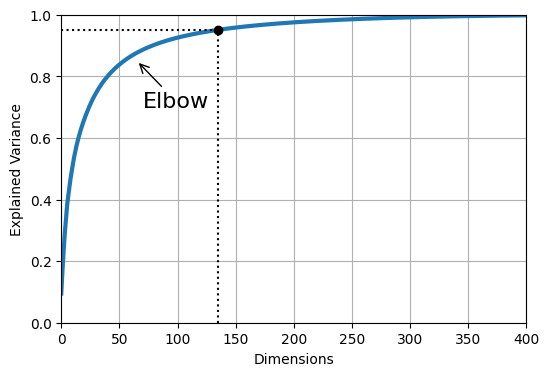

In [15]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### PCA para compresi√≥n de datos

 **Ejemplo:** intentemos aplicar PCA al conjunto de datos MNIST mientras conserva el $95\%$ de su varianza.

Deber√≠a encontrar que cada instancia tendr√° un poco m√°s de $150$ caracter√≠sticas, en lugar de las caracter√≠sticas $784$ originales.

In [16]:
pca       = PCA(n_components=0.95)
X_train = np.array(X_train)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

- Entonces, aunque se conserva la mayor parte de la variaci√≥n, ¬°el conjunto de datos ahora es inferior al $20\%$ de su tama√±o original!.

- Esta es una relaci√≥n de compresi√≥n razonable, y podemos ver c√≥mo esto puede acelerar enormemente un algoritmo de clasificaci√≥n (como un clasificador SVM).

**Ejemplo:** En el siguiente c√≥digo se comprime el conjunto de datos MNIST a $154$ dimensiones, luego usa el m√©todo *inverse_transform()* para descomprimirlo nuevamente a $784$ dimensiones. La  siguiente Figura muestra algunos d√≠gitos del conjunto de entrenamiento original (a la izquierda) y los d√≠gitos correspondientes despu√©s de la compresi√≥n y descompresi√≥n. Puede ver que hay una ligera p√©rdida de calidad de imagen, pero los d√≠gitos a√∫n est√°n casi intactos.

(30, 784)
(30, 784)


Text(0.5, 1.0, 'Compressed')

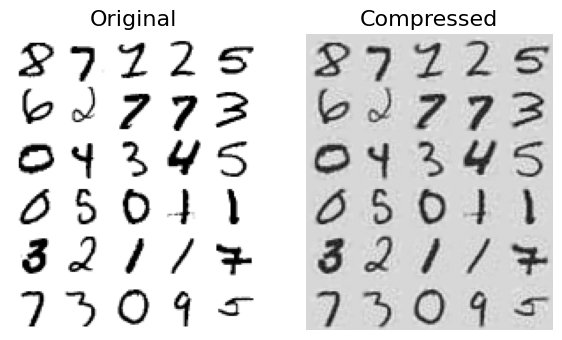

In [17]:
import matplotlib as mpl

pca         = PCA(n_components = 154)
X_reduced   = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::40])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::40])
plt.title("Compressed", fontsize=16)
#save_fig("mnist_compression_plot")

In [18]:
rnd_pca   = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

- El algoritmo Kernel PCA permite calcular los componentes principales a partir de un mapeo no lineal basado en funciones n√∫cleo.

- En KPCA los datos en $\mathbf{X}$ son mapeados a un espacio de alta dimensi√≥n desde la funci√≥n $\phi: \mathbb{R}^P \to \mathscr{F}$.

- Luego, se encuentran los componentes principales sobre la matriz kernel $\mathbf{K}\in \mathbb{R}^{N \times N}$, con $K_{nn'} = \kappa(\mathbf{x}_n,\mathbf{x}_{n'})=\langle \phi(\mathbf{x}_n),\phi(\mathbf{x}_{n'})\rangle$.


\begin{equation}
\mathbf{K} \boldsymbol{\alpha} = \lambda \boldsymbol{\alpha},
\end{equation}


- Para encontrar la proyecci√≥n de los datos:

\begin{equation}
\mathbf{z}_n = \sum_{n'=1}^N \alpha_{n'} \kappa(\mathbf{x}_n, \mathbf{x}_{n'}), \quad n = 1, 2, \ldots, N,
\end{equation}






# Ejercicio 2

- Presente un paralelo entre el problema de optimizaci√≥n de PCA y el de Kernel PCA.


# Paralelo entre PCA y Kernel PCA

## 1. Introducci√≥n y Motivaci√≥n

### Limitaciones de PCA Lineal
PCA est√°ndar encuentra **transformaciones lineales** que:
- Maximizan la varianza en el espacio proyectado.
- Minimizan el error de reconstrucci√≥n lineal.
- **Limitaci√≥n**: Solo captura relaciones lineales en los datos.

### Motivaci√≥n para Kernel PCA
**Kernel PCA** extiende PCA para capturar **relaciones no lineales** mediante:
- Mapeo impl√≠cito a espacios de mayor dimensi√≥n.
- Aplicaci√≥n de PCA en el espacio transformado.
- Uso del "kernel trick" para evitar c√°lculos expl√≠citos.

## 2. Formulaci√≥n Matem√°tica Comparativa

### PCA Lineal

**Datos**: X ‚àà ‚Ñù‚ÅøÀ£·µà (n muestras, d caracter√≠sticas)

**Problema de Optimizaci√≥n**:
```
max  Tr(W^T C W)
 W
sujeto a: W^T W = I_k
```

Donde:
- **C = (1/n)X^T X**: matriz de covarianza
- **W ‚àà ‚Ñù·µàÀ£·µè**: matriz de proyecci√≥n
- **Soluci√≥n**: W = [v‚ÇÅ, v‚ÇÇ, ..., v‚Çñ] (primeros k autovectores de C)

### Kernel PCA

**Mapeo**: œÜ: ‚Ñù·µà ‚Üí ‚Ñù·¥¥ (espacio de Hilbert, potencialmente infinito)

**Datos Transformados**: Œ¶(X) = [œÜ(x‚ÇÅ), œÜ(x‚ÇÇ), ..., œÜ(x‚Çô)]^T

**Problema de Optimizaci√≥n**:
```
max  Tr(W^T C_œÜ W)
 W
sujeto a: W^T W = I_k
```

Donde:
- **C_œÜ = (1/n)Œ¶(X)^T Œ¶(X)**: matriz de covarianza en espacio œÜ
- **Problema**: œÜ puede ser de dimensi√≥n infinita!

## 3. Comparaci√≥n Detallada de Algoritmos

| Aspecto | PCA Lineal | Kernel PCA |
|---------|------------|------------|
| **Espacio de Trabajo** | ‚Ñù·µà (original) | ‚Ñù·¥¥ (transformado) |
| **Matriz a Diagonalizar** | C (d√ód) | K (n√ón) |
| **Complejidad** | O(d¬≥) | O(n¬≥) |
| **Autovectores** | En espacio original | En espacio dual |
| **Proyecci√≥n Nueva Muestra** | W^T x | Œ£·µ¢ Œ±·µ¢ k(x, x·µ¢) |
| **Reconstrucci√≥n** | Exacta (lineal) | Aproximada (pre-imagen) |

## 4. Algoritmos Paso a Paso

### Algoritmo PCA Lineal
```
1. Centrar datos: X ‚Üê X - Œº
2. Calcular covarianza: C = (1/n)X^T X
3. Diagonalizar: C v·µ¢ = Œª·µ¢ v·µ¢
4. Ordenar: Œª‚ÇÅ ‚â• Œª‚ÇÇ ‚â• ... ‚â• Œªd
5. Seleccionar: W = [v‚ÇÅ, ..., v‚Çñ]
6. Proyectar: Z = XW
```

### Algoritmo Kernel PCA
```
1. Calcular matriz kernel: K_{ij} = k(x·µ¢, x‚±º)
2. Centrar en espacio œÜ: KÃÉ = K - 1‚ÇôK - K1‚Çô + 1‚ÇôK1‚Çô
3. Diagonalizar: KÃÉ Œ±·µ¢ = Œª·µ¢ Œ±·µ¢
4. Normalizar: Œ±·µ¢ ‚Üê Œ±·µ¢/‚àöŒª·µ¢
5. Ordenar: Œª‚ÇÅ ‚â• Œª‚ÇÇ ‚â• ... ‚â• Œª‚Çô
6. Proyectar nueva muestra: z_j = Œ£·µ¢ Œ±‚±º·µ¢ k(x, x·µ¢)
```


## 5. Propiedades Matem√°ticas Comparativas

### Preservaci√≥n de Varianza

**PCA Lineal**:
```
Varianza preservada = Œ£·µ¢‚Çå‚ÇÅ·µè Œª·µ¢ / Œ£·µ¢‚Çå‚ÇÅ·µà Œª·µ¢
```

**Kernel PCA**:
```
Varianza preservada = Œ£·µ¢‚Çå‚ÇÅ·µè Œª·µ¢ / Œ£·µ¢‚Çå‚ÇÅ‚Åø Œª·µ¢
```

### Reconstrucci√≥n

**PCA Lineal**:
```
xÃÇ = WW^T x  (exacta en subespacio)
```

**Kernel PCA**:
```
Problema de pre-imagen: œÜ‚Åª¬π(Œ£·µ¢ Œ±·µ¢ œÜ(x·µ¢))
```
- No siempre existe soluci√≥n exacta.
- Requiere m√©todos iterativos.

## 6. Ventajas y Desventajas

### PCA Lineal
**Ventajas**:
- Computacionalmente eficiente O(d¬≥).
- Reconstrucci√≥n exacta.
- Interpretaci√≥n clara.
- Proyecci√≥n directa de nuevas muestras.

**Desventajas**:
- Solo relaciones lineales.
- Puede fallar con estructuras no lineales (manifolds).

### Kernel PCA
**Ventajas**:
- Captura relaciones no lineales.
- Flexible (diferentes kernels).
- Potencialmente m√°s expresivo.
- Bueno para manifolds no lineales.

**Desventajas**:
- Complejidad O(n¬≥).
- Problema de pre-imagen.
- Selecci√≥n de kernel y par√°metros.
- Menos interpretable.

## 7. Casos de Uso Comparativos

### Cu√°ndo usar PCA Lineal
- Datos con estructura lineal.
- Necesidad de interpretabilidad.
- Datasets grandes (d >> n).
- Reconstrucci√≥n exacta requerida.

### Cu√°ndo usar Kernel PCA
- Estructuras no lineales (espirales, c√≠rculos).
- Manifolds curvos.
- Cuando PCA lineal falla.
- An√°lisis exploratorio de patrones complejos.


**Ejemplo:** el siguiente c√≥digo utiliza la clase *KernelPCA* de Scikit-Learn para realizar kPCA con un kernel RBF.

- Se utilizar√° el swiss-roll para facilitar la visualizaci√≥n.

In [19]:
from sklearn.decomposition import KernelPCA

#se ilustra nuevamente sobre swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


rbf_pca   = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

- Ahora se comparan tres kernels distintos para encontrar la proyecci√≥n de los datos:

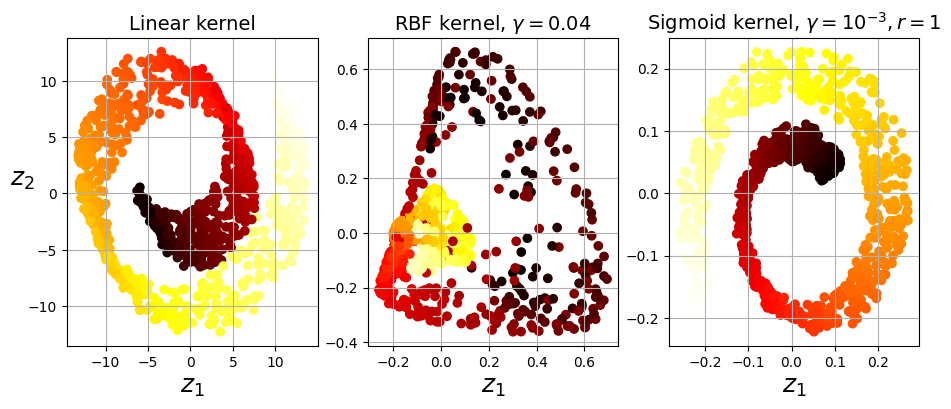

In [20]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
#save_fig("kernel_pca_plot")
plt.show()

La Figura muestra el rollo suizo, reducido a dos dimensiones usando un n√∫cleo lineal (equivalente a simplemente usar la clase *PCA*), un n√∫cleo RBF y un n√∫cleo sigmoide (Log√≠stico).

### kPCA: Definiendo el kernel y sus hiperpar√°metros

- Como kPCA es un algoritmo de aprendizaje no supervisado, *no existe una medida de rendimiento obvia para ayudarlo a seleccionar los mejores valores de kernel e hiperpar√°metros*.

- Sin embargo, la reducci√≥n de dimensionalidad es a menudo un paso de preparaci√≥n para una tarea de aprendizaje supervisada (por ejemplo, clasificaci√≥n), por lo que simplemente puede usar la **b√∫squeda de cuadr√≠cula** para seleccionar el n√∫cleo y los hiperpar√°metros conducen al mejor rendimiento en esa tarea.

**Ejemplo:** el siguiente c√≥digo crea una gu√≠a de dos pasos para la clasificaci√≥n de la base de datos Mnist.

- Primero reduciendo la dimensionalidad a dos dimensiones usando kPCA, luego aplicando Regresi√≥n log√≠stica para la clasificaci√≥n.

- Se utiliza *GridSearchCV* para encontrar el mejor valor de kernel y gamma para kPCA para obtener la mejor precisi√≥n de clasificaci√≥n al final de la gu√≠a:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

Los mejores kernels e hiperpar√°metros est√°n disponibles a trav√©s de la variable *best_params_*:

In [22]:
print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.03), 'kpca__kernel': 'rbf'}


**Tal vez se pregunte c√≥mo realizar la reconstrucci√≥n de una instancia proyectada con kPCA?**.

- Una soluci√≥n es entrenar un modelo de regresi√≥n supervisado, con las instancias proyectadas como el conjunto de entrenamiento y las instancias originales como los objetivos.

- Scikit-Learn lo har√° autom√°ticamente si configura *fit_inverse_transform = True*, ([pre-image problem](https://www.aaai.org/Papers/ICML/2003/ICML03-055.pdf)) como se muestra en el siguiente c√≥digo:

In [23]:
from sklearn.metrics import mean_squared_error

rbf_pca    = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced  = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)

32.78630879576612

Podemos usar GridSearchCV para encontrar el n√∫cleo y los hiperpar√°metros que minimizan este error de reconstrucci√≥n pre-imagen.

## t-distributed stochastic neighborhood embedding

- [t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwA) es de los algoritmos m√°s potentes en reducci√≥n de dimensi√≥n dado que permite unir los principios de manifold learning y probabilidades, para lidear con el problema de concentraci√≥n de las normas (m√©tricas en espacios de alta dimensi√≥n se distribuyen muy diferente a m√©tricas en espacios de baja dimensi√≥n).


![gifpca](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)



- t-SNE busca minimizar la diferencia entre las funciones de probabilidad del espacio original (alta dimensi√≥n) y el espacio reducido (baja dimensi√≥n), evitando el problema de la concentraci√≥n de la norma.


- La similitud es modelada como una distribuci√≥n Gaussiana, tal que la probabilidad condicional $p_{n'|n}$ que define si  $\mathbf{x}_n$ selecciona a $\mathbf{x}_{n'}$ como su vecino es:

\begin{equation}
p_{n'|n} = \frac{\exp(-\|\mathbf{x}_n - \mathbf{x}_{n'}\|^2 / 2\sigma_n^2)}{\sum_{k \neq n} \exp(-\|\mathbf{x}_n - \mathbf{x}_k\|^2 / 2\sigma_n^2)},
\end{equation}

donde $\sigma_n\in \mathbb{R}^+$.

La probabilidad conjunta se puede definir como :

\begin{equation}
p_{nn'} = \frac{p_{n'|n} + p_{n|n'}}{2N}.
\end{equation}



- Para el espacio de baja dimensi√≥n se utiliza un distribuci√≥n t-Student con un grado de libertad (distribuci√≥n de Cauchy).

- La probabilidad conjunta $q_{nn'}$ que modela si $\mathbf{y}_n$ y $\mathbf{z}_{n'}$ est√°n cercanos es dada por:

\begin{equation}
q_{nn'} = \frac{(1 + \|\mathbf{z}_n - \mathbf{z}_{n'}\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{z}_k - \mathbf{z}_l\|^2)^{-1}}.
\end{equation}


- t-SNE minimiza la divergencia de  Kullback-Leibler (KL) entre $P = \{p_{nn'}\}$ y $Q = \{q_{nn'}\}$:

\begin{equation}
\text{KL}(P \| Q) = \sum_{n \neq n'} p_{nn'} \log \left( \frac{p_{nn'}}{q_{nn'}} \right).
\end{equation}

- La minizaci√≥n se resuelve convencionalmente por m√©todos de gradiente.

- Es importante resaltar que el ancho de bando en el espacio de alta dimensi√≥n se fija por muestra, fijando un valor de entropia com√∫n (perplexity).




In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity= 20, random_state=42,init='pca')
X_reduced_tsne = tsne.fit_transform(X)

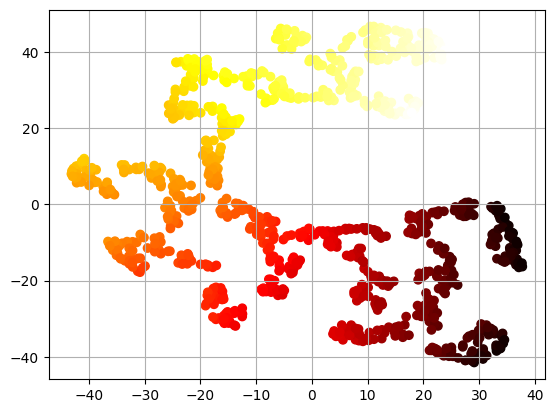

In [25]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


## Uniform Manifold Approximation and Projection (UMAP)

![gifumap](https://umap-learn.readthedocs.io/en/latest/_images/aligned_umap_pendigits_anim.gif)

- UMAP es una t√©cnica de reducci√≥n de dimensi√≥n que modela el espacio de alta dimensi√≥n como estructura topol√≥gica difusa y la optimiza en el espacio de baja dimensi√≥n preservando distancias globales y locales.

- UMAP construye un grafo ponderado para representar la estructura topol√≥gica difusa.

- La probabilidad $p_{nn'}$ que representa el peso del borde entre $\mathbf{x}_n$ and $\mathbf{x}_{n'}$ esta dada por:

\begin{equation}
p_{nn'} = \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_{n'}\| - \rho_n}{\sigma_n}\right),
\end{equation}

- $\rho_n$ es la distancia al vecino m√°s cercano de $\mathbf{x}_n$, lo que asegura que las distancias locales no se ven afectadas por ruido.
    
- $\sigma_n$ se determina por una un n√∫mero fijo de vecinos.


- La relaci√≥n difusa se vuelve sim√©trica como:

\begin{equation}
\tilde{p}_{nn'} = p_{nn'} + p_{n'n} - p_{nn'} p_{n'n}.
\end{equation}



- Las relaciones en el espacio de baja dimensi√≥n se fijan mediante una distribuci√≥n t-student de cola pesada:

\begin{equation}
q_{nn'} = \left(1 + a \|\mathbf{z}_n - \mathbf{z}_{n'}\|^{2b}\right)^{-1},
\end{equation}

con $a$ y $b$ como par√°metros de la distribuci√≥n. Generalmente se fijan en 1.


- UMAP minimiza la entrop√≠a cruzada :

\begin{equation}
C(P;Q) = \sum_{n \neq n'} \left( -\tilde{p}_{nn'} \log(q_{nn'}) - (1 - \tilde{p}_{nn'}) \log(1 - q_{nn'}) \right).
\end{equation}

- Convencionalmente se utilizan m√©todos de gradiente para resolver la optimizaci√≥n.

In [26]:
!pip install umap-learn #librer√≠a umap
!pip install datashader bokeh holoviews #gr√°ficos umap

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 81.7 MB/s eta 0:00:00


In [27]:
import umap
import umap.plot

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,

In [28]:
red = umap.UMAP(n_components=2,n_neighbors=40, min_dist=0.2)
X_reduced_umap = red.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


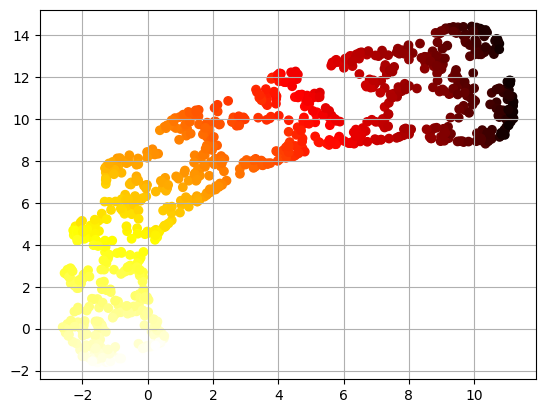

In [29]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


- UMAP presenta una serie de m√©todos para [gr√°ficos interactivos](https://umap-learn.readthedocs.io/en/latest/plotting.html)

<Axes: >

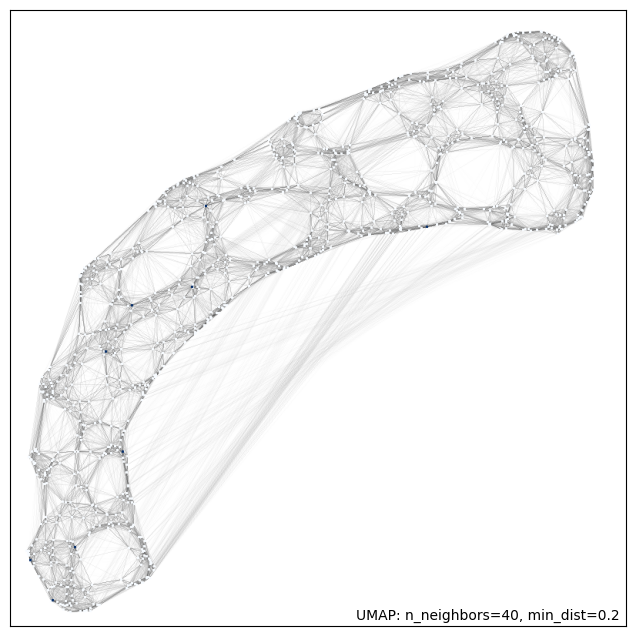

In [30]:
umap.plot.connectivity(red, show_points=True)

/usr/local/lib/python3.11/dist-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

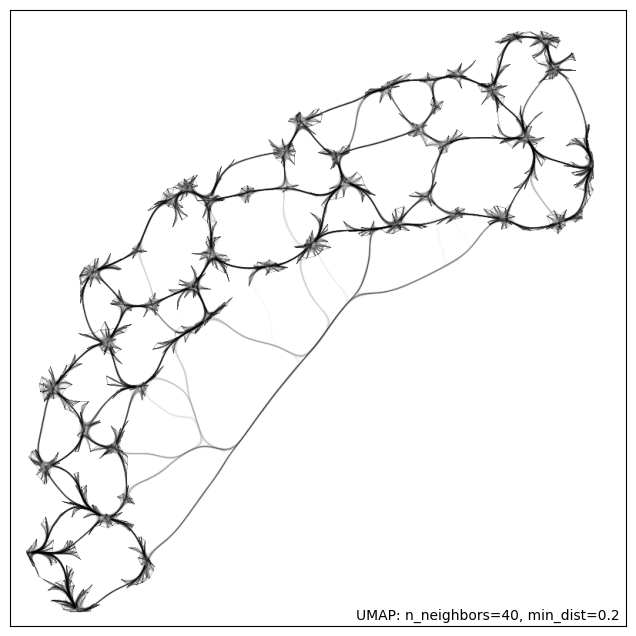

In [31]:
umap.plot.connectivity(red, edge_bundling='hammer')

# Ejercicio 3



1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducci√≥n de dimensi√≥n con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una an√°lisis comparativo en t√©rminos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los m√©todos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librer√≠a [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.


In [32]:
#Ayuda de c√≥digo
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)


In [33]:
#graficar 2D con im√°genes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resoluci√≥n original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

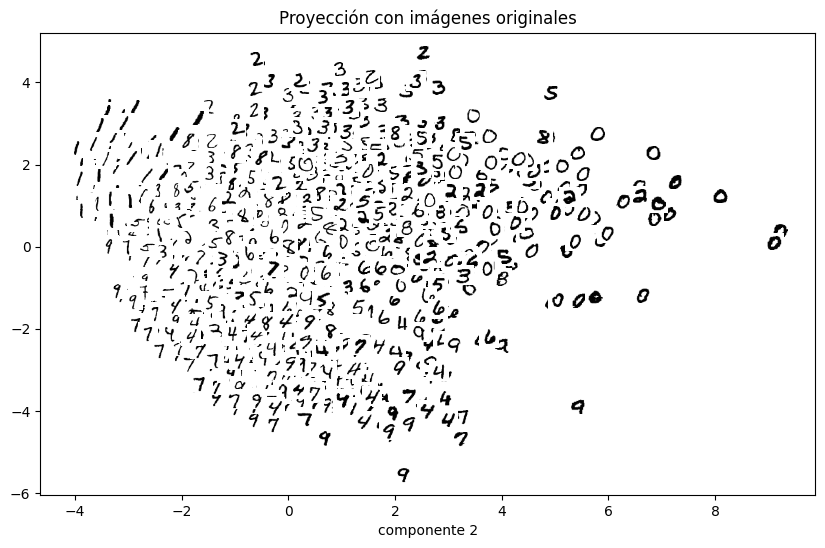

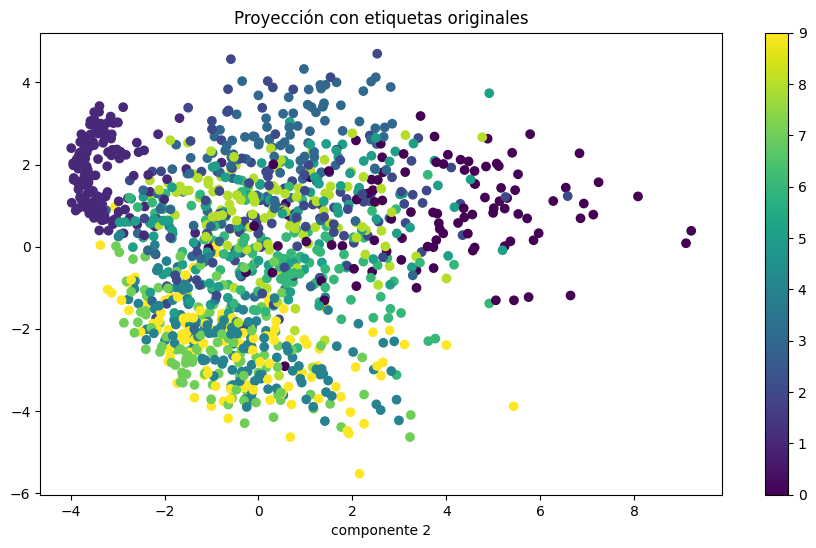

In [34]:
plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyecci√≥n con im√°genes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyecci√≥n con etiquetas originales')
plt.colorbar()
plt.show()

In [35]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


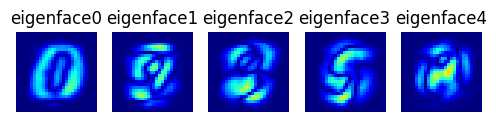

In [36]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resoluci√≥n imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

**EJERCICIO 3:**

# Eigenfaces y PCA: Algoritmos de Reducci√≥n de Dimensi√≥n

## ¬øQu√© son los Eigenfaces?

**Eigenfaces** es un algoritmo espec√≠fico para reconocimiento facial que utiliza PCA como base matem√°tica. El t√©rmino "eigenface" significa literalmente "cara propia" o "cara caracter√≠stica".

### Funcionamiento:
1. **Recopilaci√≥n**: Se toman m√∫ltiples im√°genes faciales del mismo tama√±o
2. **Vectorizaci√≥n**: Cada imagen se convierte en un vector unidimensional
3. **Aplicaci√≥n de PCA**: Se calculan los componentes principales (eigenfaces)
4. **Proyecci√≥n**: Las caras se representan como combinaciones lineales de estos eigenfaces

## Comparaci√≥n: Eigenfaces vs PCA

| Aspecto | PCA (General) | Eigenfaces |
|---------|---------------|------------|
| **Dominio** | Algoritmo general para cualquier tipo de datos | Aplicaci√≥n espec√≠fica de PCA para im√°genes faciales |
| **Objetivo** | Reducir dimensionalidad preservando m√°xima varianza | Crear representaci√≥n compacta de rostros para reconocimiento |
| **Datos de entrada** | Cualquier matriz de datos num√©ricos | Im√°genes faciales normalizadas |
| **Componentes** | Componentes principales abstractos | Eigenfaces (im√°genes que parecen rostros fantasmales) |
| **Interpretaci√≥n** | Direcciones de m√°xima varianza en el espacio original | Caracter√≠sticas faciales fundamentales |

## Relaci√≥n entre ambos

**Eigenfaces ES PCA aplicado a rostros**. La diferencia principal es el contexto y la interpretaci√≥n:

- **PCA** es la t√©cnica matem√°tica subyacente
- **Eigenfaces** es la implementaci√≥n espec√≠fica para reconocimiento facial
- Los eigenfaces son los eigenvectors de la matriz de covarianza de las im√°genes faciales
- Ambos buscan reducir dimensionalidad manteniendo la informaci√≥n m√°s relevante

## Ventajas de Eigenfaces
- Reducci√≥n dr√°stica de dimensionalidad (de miles de p√≠xeles a decenas de componentes)
- Eficiencia computacional en reconocimiento
- Robustez ante variaciones menores de iluminaci√≥n y expresi√≥n

Librer√≠as cargadas correctamente!
Dimensiones de los datos de entrenamiento muestreados: (1200, 784)
Dimensiones de las etiquetas de entrenamiento muestreadas: (1200,)

Aplicando t√©cnicas de reducci√≥n de dimensionalidad...
1. Aplicando PCA...
   Varianza explicada: 0.1680
2. Aplicando Kernel PCA (RBF)...
3. Aplicando t-SNE...
4. Aplicando UMAP...
Todas las t√©cnicas de reducci√≥n aplicadas exitosamente!

Realizando clustering con K-Means y calculando coeficientes de silueta...

Procesando PCA...
   Coeficiente de silueta: 0.3523

Procesando Kernel PCA (RBF)...
   Coeficiente de silueta: 0.3523

Procesando t-SNE...
   Coeficiente de silueta: 0.4290

Procesando UMAP...
   Coeficiente de silueta: 0.4900

Generando visualizaciones...


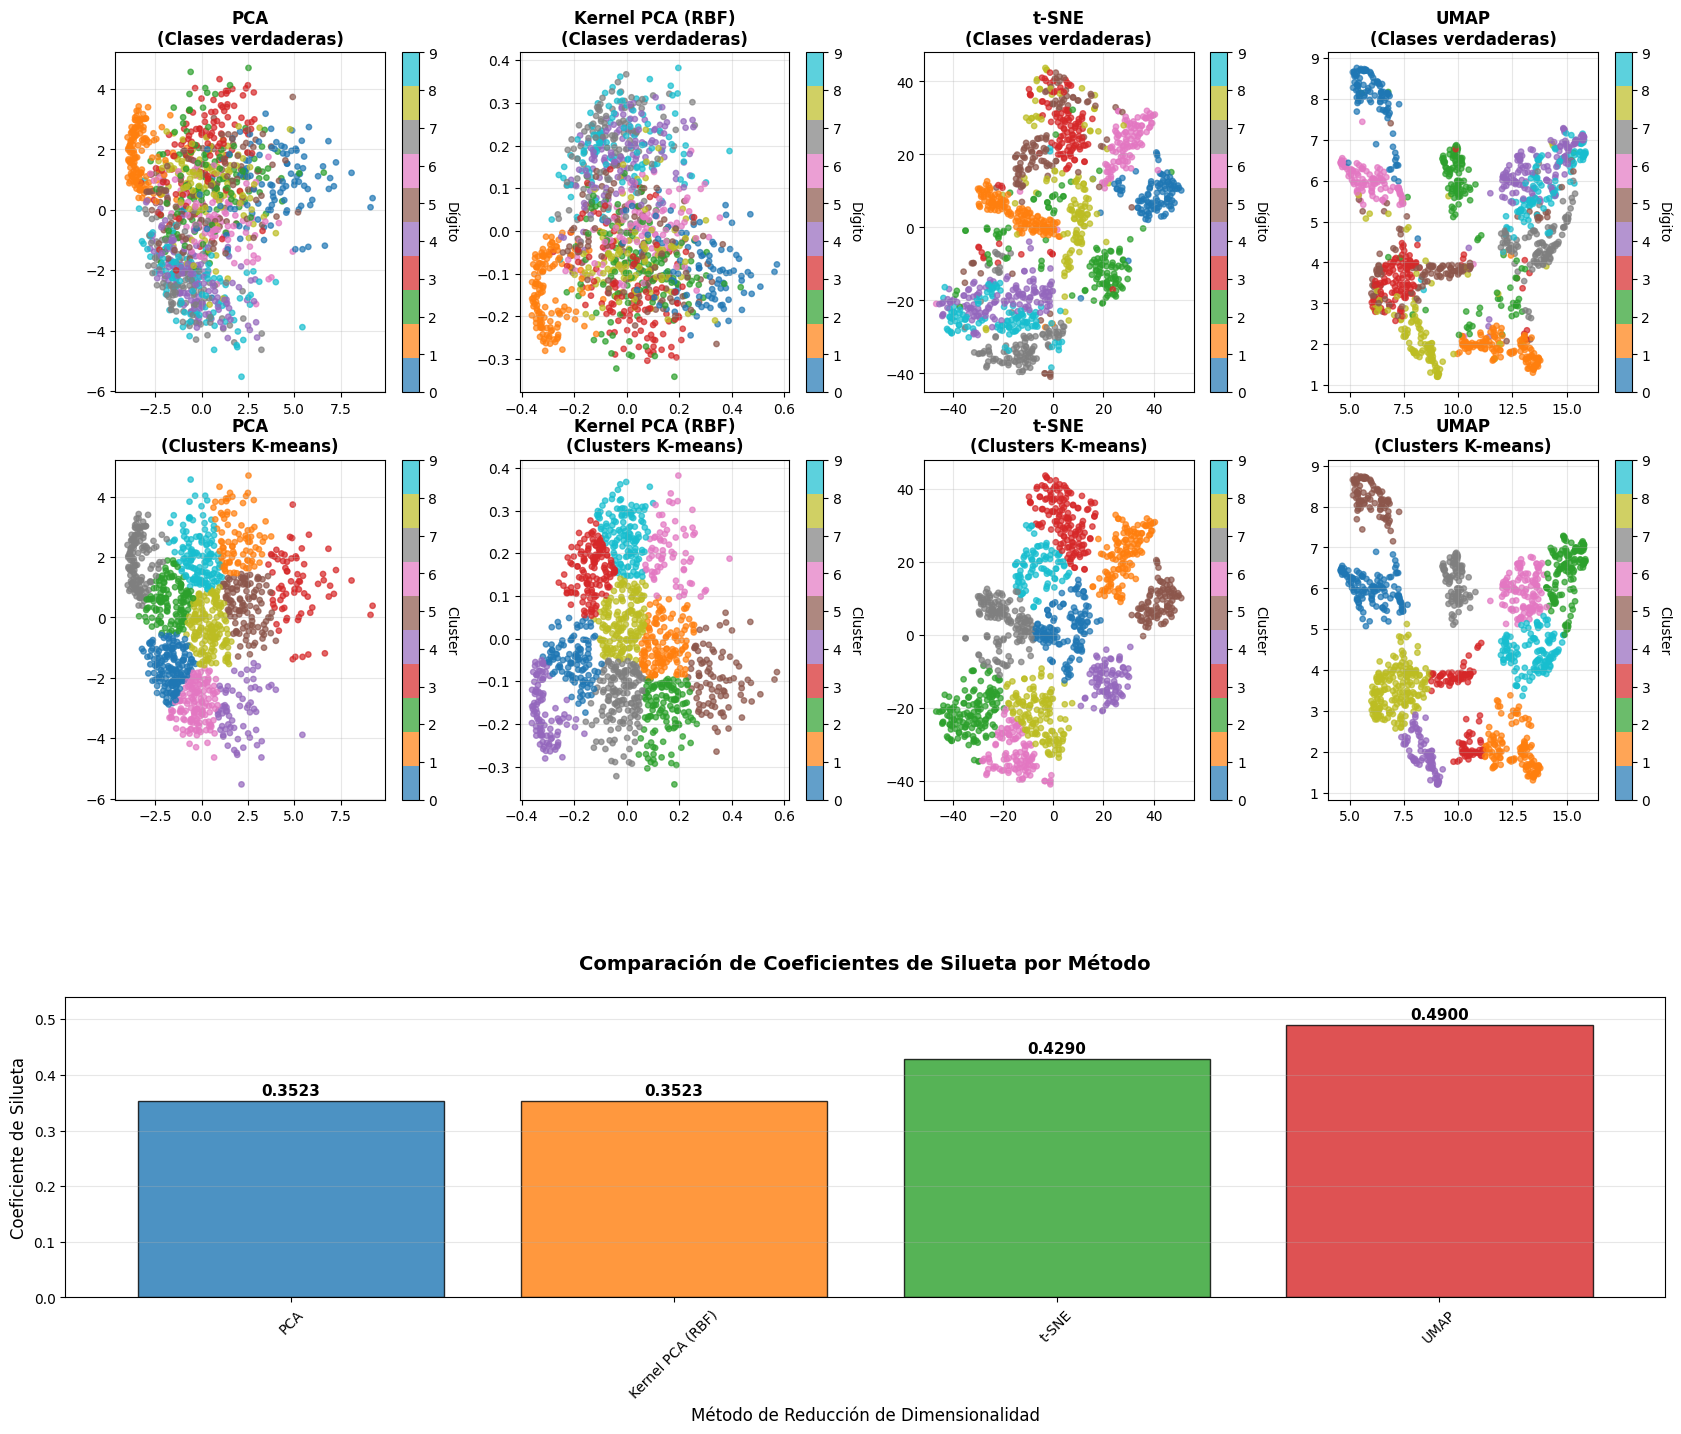


AN√ÅLISIS DETALLADO POR M√âTODO

üîπ PCA:
   ‚Ä¢ Coeficiente de silueta: 0.3523
   ‚Ä¢ N√∫mero de clusters encontrados: 10
   ‚Ä¢ Distribuci√≥n de puntos por cluster: {np.int32(0): np.int64(164), np.int32(1): np.int64(88), np.int32(2): np.int64(133), np.int32(3): np.int64(71), np.int32(4): np.int64(66), np.int32(5): np.int64(112), np.int32(6): np.int64(143), np.int32(7): np.int64(132), np.int32(8): np.int64(156), np.int32(9): np.int64(135)}
   ‚Ä¢ Inercia (WCSS): 1195.95

üîπ KERNEL PCA (RBF):
   ‚Ä¢ Coeficiente de silueta: 0.3523
   ‚Ä¢ N√∫mero de clusters encontrados: 10
   ‚Ä¢ Distribuci√≥n de puntos por cluster: {np.int32(0): np.int64(109), np.int32(1): np.int64(135), np.int32(2): np.int64(121), np.int32(3): np.int64(136), np.int32(4): np.int64(101), np.int32(5): np.int64(86), np.int32(6): np.int64(71), np.int32(7): np.int64(150), np.int32(8): np.int64(159), np.int32(9): np.int64(132)}
   ‚Ä¢ Inercia (WCSS): 7.11

üîπ T-SNE:
   ‚Ä¢ Coeficiente de silueta: 0.4290
   ‚Ä¢ N√∫mero 

In [41]:
# Importar librer√≠as necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow import keras
import umap
import warnings
warnings.filterwarnings('ignore')

print("Librer√≠as cargadas correctamente!")

# =============================================================================
# CARGAR Y PREPARAR DATOS MNIST
# =============================================================================

# Cargar el dataset completo de MNIST
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# Aplanar las im√°genes y normalizar
X_full = X_train_full.reshape(X_train_full.shape[0], -1) / 255.0
y_full = y_train_full

# Aplicar el submuestreo
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.98, random_state=123
)

print(f"Dimensiones de los datos de entrenamiento muestreados: {X_train.shape}")
print(f"Dimensiones de las etiquetas de entrenamiento muestreadas: {y_train.shape}")

# =============================================================================
# APLICAR T√âCNICAS DE REDUCCI√ìN DE DIMENSIONALIDAD
# =============================================================================

print("\nAplicando t√©cnicas de reducci√≥n de dimensionalidad...")

# 1. PCA lineal a 2 componentes
print("1. Aplicando PCA...")
pca_mnist = PCA(n_components=2, random_state=42)
X_reduced_pca_mnist = pca_mnist.fit_transform(X_train)
print(f"   Varianza explicada: {pca_mnist.explained_variance_ratio_.sum():.4f}")

# 2. Kernel PCA (RBF) a 2 componentes
print("2. Aplicando Kernel PCA (RBF)...")
rbf_pca_mnist = KernelPCA(n_components=2, kernel="rbf", gamma=0.005, random_state=42)
X_reduced_rbf_pca_mnist = rbf_pca_mnist.fit_transform(X_train)

# 3. t-SNE a 2 componentes
print("3. Aplicando t-SNE...")
tsne_mnist = TSNE(n_components=2, perplexity=30, random_state=42,
                  init='pca', learning_rate='auto', n_iter=1000)
X_reduced_tsne_mnist = tsne_mnist.fit_transform(X_train)

# 4. UMAP a 2 componentes
print("4. Aplicando UMAP...")
umap_mnist = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_reduced_umap_mnist = umap_mnist.fit_transform(X_train)

print("Todas las t√©cnicas de reducci√≥n aplicadas exitosamente!")

# =============================================================================
# CLUSTERING CON K-MEANS Y AN√ÅLISIS DE SILUETA
# =============================================================================

print("\nRealizando clustering con K-Means y calculando coeficientes de silueta...")

# Definir el n√∫mero de clusters (10 para los d√≠gitos 0-9)
n_clusters = 10

# Diccionario para almacenar resultados
results = {}
reduced_data = {
    'PCA': X_reduced_pca_mnist,
    'Kernel PCA (RBF)': X_reduced_rbf_pca_mnist,
    't-SNE': X_reduced_tsne_mnist,
    'UMAP': X_reduced_umap_mnist
}

# Aplicar K-means y calcular coeficiente de silueta para cada m√©todo
for method_name, data in reduced_data.items():
    print(f"\nProcesando {method_name}...")

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300, n_init=10)
    cluster_labels = kmeans.fit_predict(data)

    # Calcular coeficiente de silueta
    silhouette_avg = silhouette_score(data, cluster_labels)

    # Almacenar resultados
    results[method_name] = {
        'data': data,
        'labels': cluster_labels,
        'silhouette_score': silhouette_avg,
        'kmeans_model': kmeans
    }

    print(f"   Coeficiente de silueta: {silhouette_avg:.4f}")

# =============================================================================
# VISUALIZACI√ìN COMPARATIVA
# =============================================================================

print("\nGenerando visualizaciones...")

# Crear figura grande para mostrar todos los resultados
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Primera fila: Visualizar datos reducidos coloreados por clases verdaderas
for i, (method_name, result) in enumerate(results.items()):
    data = result['data']

    scatter = axes[0, i].scatter(data[:, 0], data[:, 1], c=y_train,
                                cmap='tab10', alpha=0.7, s=15)
    axes[0, i].set_title(f"{method_name}\n(Clases verdaderas)", fontsize=12, fontweight='bold')
    axes[0, i].grid(True, alpha=0.3)

    # A√±adir colorbar
    cbar = plt.colorbar(scatter, ax=axes[0, i])
    cbar.set_label('D√≠gito', rotation=270, labelpad=15)

# Segunda fila: Visualizar clusters de K-means
for i, (method_name, result) in enumerate(results.items()):
    data = result['data']
    labels = result['labels']

    scatter = axes[1, i].scatter(data[:, 0], data[:, 1], c=labels,
                                cmap='tab10', alpha=0.7, s=15)
    axes[1, i].set_title(f"{method_name}\n(Clusters K-means)", fontsize=12, fontweight='bold')
    axes[1, i].grid(True, alpha=0.3)

    # A√±adir colorbar
    cbar = plt.colorbar(scatter, ax=axes[1, i])
    cbar.set_label('Cluster', rotation=270, labelpad=15)

# Tercera fila: Gr√°fico de barras con coeficientes de silueta
# Eliminar subplots no necesarios y crear uno grande
for j in range(1, 4):
    fig.delaxes(axes[2, j])

ax_bar = axes[2, 0]
ax_bar.set_position([0.1, 0.05, 0.8, 0.2])

methods = list(results.keys())
silhouette_scores = [results[method]['silhouette_score'] for method in methods]

# Crear barras con colores diferentes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax_bar.bar(methods, silhouette_scores, color=colors, alpha=0.8, edgecolor='black')

ax_bar.set_title('Comparaci√≥n de Coeficientes de Silueta por M√©todo',
                fontsize=14, fontweight='bold', pad=20)
ax_bar.set_ylabel('Coeficiente de Silueta', fontsize=12)
ax_bar.set_xlabel('M√©todo de Reducci√≥n de Dimensionalidad', fontsize=12)
ax_bar.grid(True, alpha=0.3, axis='y')

# A√±adir valores encima de las barras
for i, (bar, score) in enumerate(zip(bars, silhouette_scores)):
    ax_bar.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.005,
                f'{score:.4f}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)

# Mejorar legibilidad
ax_bar.tick_params(axis='x', rotation=45)
ax_bar.set_ylim(0, max(silhouette_scores) * 1.1)

plt.tight_layout()
plt.show()

# =============================================================================
# AN√ÅLISIS DETALLADO POR M√âTODO
# =============================================================================

print("\n" + "="*70)
print("AN√ÅLISIS DETALLADO POR M√âTODO")
print("="*70)

for method_name, result in results.items():
    print(f"\nüîπ {method_name.upper()}:")
    print(f"   ‚Ä¢ Coeficiente de silueta: {result['silhouette_score']:.4f}")

    # Calcular estad√≠sticas adicionales
    labels = result['labels']
    unique_labels, counts = np.unique(labels, return_counts=True)

    print(f"   ‚Ä¢ N√∫mero de clusters encontrados: {len(unique_labels)}")
    print(f"   ‚Ä¢ Distribuci√≥n de puntos por cluster: {dict(zip(unique_labels, counts))}")

    # Calcular inercia (suma de distancias cuadradas a centroides)
    kmeans_model = result['kmeans_model']
    print(f"   ‚Ä¢ Inercia (WCSS): {kmeans_model.inertia_:.2f}")

# =============================================================================
# RESUMEN DE RESULTADOS Y RANKING
# =============================================================================

print("\n" + "="*70)
print("RANKING Y RESUMEN DE RESULTADOS")
print("="*70)

# Ordenar m√©todos por coeficiente de silueta (de mayor a menor)
sorted_results = sorted(results.items(), key=lambda x: x[1]['silhouette_score'], reverse=True)

print(f"{'Pos.':<5} {'M√©todo':<18} {'Coef. Silueta':<15} {'Calidad':<12}")
print("-" * 70)

def get_quality_label(score):
    if score >= 0.5:
        return "Excelente"
    elif score >= 0.3:
        return "Buena"
    elif score >= 0.1:
        return "Regular"
    else:
        return "Pobre"

for rank, (method_name, result) in enumerate(sorted_results, 1):
    score = result['silhouette_score']
    quality = get_quality_label(score)
    medal = "ü•á" if rank == 1 else "ü•à" if rank == 2 else "ü•â" if rank == 3 else "  "

    print(f"{medal} {rank:<3} {method_name:<18} {score:<15.4f} {quality:<12}")

# =============================================================================
# INTERPRETACI√ìN Y CONCLUSIONES
# =============================================================================

print("\n" + "="*70)
print("INTERPRETACI√ìN DE RESULTADOS")
print("="*70)

best_method = sorted_results[0][0]
best_score = sorted_results[0][1]['silhouette_score']

print(f"""
üìä INTERPRETACI√ìN DEL COEFICIENTE DE SILUETA:
   ‚Ä¢ Rango: [-1, 1]
   ‚Ä¢ Valores cercanos a 1: clusters muy bien separados
   ‚Ä¢ Valores cercanos a 0: clusters superpuestos
   ‚Ä¢ Valores negativos: puntos mal asignados a clusters

üèÜ MEJOR M√âTODO: {best_method}
   ‚Ä¢ Coeficiente de silueta: {best_score:.4f}
   ‚Ä¢ Esto indica una {get_quality_label(best_score).lower()} separaci√≥n de clusters

üîç OBSERVACIONES:
   ‚Ä¢ MNIST tiene 10 clases naturales (d√≠gitos 0-9)
   ‚Ä¢ M√©todos no lineales suelen funcionar mejor para este dataset
   ‚Ä¢ t-SNE y UMAP son especialmente buenos para visualizaci√≥n
   ‚Ä¢ PCA puede ser limitado por su naturaleza lineal

üìà RECOMENDACIONES:
   ‚Ä¢ Para visualizaci√≥n: usar el m√©todo con mayor coeficiente de silueta
   ‚Ä¢ Para an√°lisis posterior: considerar tanto la calidad como la interpretabilidad
   ‚Ä¢ Para aplicaciones en tiempo real: balancear calidad vs velocidad de c√≥mputo
""")

print("="*70)
print(f"An√°lisis completado con {X_train.shape[0]} muestras de MNIST")
print("="*70)

# An√°lisis de T√©cnicas de Reducci√≥n de Dimensionalidad

## 1. PCA (Principal Component Analysis) - Superior Izquierda

**Lo que vemos:** Un patr√≥n circular con colores que van del amarillo al rojo oscuro, formando anillos conc√©ntricos.

**Explicaci√≥n:**
- PCA es una t√©cnica **lineal** que busca las direcciones de m√°xima varianza
- Preserva bien las relaciones lineales pero tiene dificultades con estructuras no lineales
- En este caso, parece estar capturando una estructura circular/anular del dataset original
- La gradaci√≥n de colores sugiere que hay una progresi√≥n suave en los datos originales
- **Limitaci√≥n:** No puede "desenrollar" estructuras complejas no lineales

## 2. Kernel PCA (RBF) - Superior Derecha

**Lo que vemos:** Los datos se han "desenrollado" parcialmente, mostrando una estructura m√°s extendida con forma de media luna o arco.

**Explicaci√≥n:**
- Kernel PCA usa el **kernel RBF (Radial Basis Function)** para mapear datos a un espacio de mayor dimensi√≥n
- Puede capturar relaciones **no lineales** que PCA tradicional no puede
- Ha logrado "abrir" la estructura circular, revelando la geometr√≠a subyacente
- La separaci√≥n de colores es m√°s clara, indicando mejor preservaci√≥n de la estructura local
- **Ventaja:** Maneja mejor las relaciones no lineales complejas

## 3. t-SNE (t-Distributed Stochastic Neighbor Embedding) - Inferior Izquierda

**Lo que vemos:** Clusters muy bien definidos y separados, con colores agrupados de manera clara.

**Explicaci√≥n:**
- t-SNE se especializa en **preservar relaciones locales** y crear visualizaciones interpretables
- Excelente para formar clusters bien separados y visualizar agrupaciones
- Cada color representa un grupo claramente diferenciado
- **Fortaleza:** Ideal para exploraci√≥n de datos y detecci√≥n de clusters
- **Limitaci√≥n:** Puede crear separaciones artificiales y no preserva distancias globales

## 4. UMAP (Uniform Manifold Approximation and Projection) - Inferior Derecha

**Lo que vemos:** Una estructura continua que parece un "Swiss roll" desenrollado, manteniendo la conectividad gradual de colores.

**Explicaci√≥n:**
- UMAP balancea la **preservaci√≥n de estructura local Y global**
- Mantiene la continuidad del gradiente de colores (estructura global)
- Permite ver la progresi√≥n natural de los datos sin crear separaciones artificiales
- **Ventaja clave:** Preserva tanto la topolog√≠a local como las relaciones globales
- M√°s r√°pido que t-SNE y mejor para datasets grandes

## Comparaci√≥n de Resultados

| T√©cnica | Estructura Capturada | Mejor Para |
|---------|---------------------|------------|
| **PCA** | Relaciones lineales b√°sicas | An√°lisis r√°pido, reducci√≥n inicial |
| **Kernel PCA** | Relaciones no lineales moderadas | Cuando PCA es insuficiente |
| **t-SNE** | Clusters y agrupaciones locales | Exploraci√≥n y visualizaci√≥n de clusters |
| **UMAP** | Balance estructura local-global | Visualizaci√≥n general y an√°lisis exploratorio |

## Conclusi√≥n

Cada t√©cnica revela aspectos diferentes del mismo dataset:
- **PCA:** Muestra la forma b√°sica pero limitada por linealidad
- **Kernel PCA:** Mejora la captura de no linealidades
- **t-SNE:** Enfatiza la separaci√≥n en grupos
- **UMAP:** Ofrece el mejor balance para entender la estructura completa

**Nota**: No use la libreria RAPIDS, porque me salian muchos errores cuando queria instalarla.